# Import Libraries

In [1]:
import requests
from time import sleep
import json
import pandas as pd
from PIL import Image
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns=999
pd.options.display.max_rows=999

# Load JSON of cards

In [2]:
scryfall = pd.read_json('Data/scryfall-default-cards.json')

In [3]:
scryfall.columns

Index(['all_parts', 'arena_id', 'artist', 'artist_ids', 'booster',
       'border_color', 'card_back_id', 'card_faces', 'cmc', 'collector_number',
       'color_identity', 'color_indicator', 'colors', 'digital', 'edhrec_rank',
       'flavor_text', 'foil', 'frame', 'frame_effects', 'full_art', 'games',
       'hand_modifier', 'highres_image', 'id', 'illustration_id', 'image_uris',
       'lang', 'layout', 'legalities', 'life_modifier', 'loyalty', 'mana_cost',
       'mtgo_foil_id', 'mtgo_id', 'multiverse_ids', 'name', 'nonfoil',
       'object', 'oracle_id', 'oracle_text', 'oversized', 'power', 'preview',
       'printed_name', 'printed_text', 'printed_type_line',
       'prints_search_uri', 'promo', 'promo_types', 'rarity', 'related_uris',
       'released_at', 'reprint', 'reserved', 'rulings_uri', 'scryfall_set_uri',
       'scryfall_uri', 'set', 'set_name', 'set_search_uri', 'set_type',
       'set_uri', 'story_spotlight', 'tcgplayer_id', 'textless', 'toughness',
       'type_line',

In [29]:
scryfall.drop(columns=['arena_id','artist_ids','booster','border_color','card_back_id','card_faces',
                       'collector_number','digital','flavor_text','foil','frame','frame_effects','full_art',
                       'hand_modifier','id','illustration_id','life_modifier','mtgo_foil_id','mtgo_id',
                       'multiverse_ids','nonfoil','object','oracle_id','printed_name','prints_search_uri',
                       'promo','promo_types','rarity','related_uris','rulings_uri','scryfall_set_uri','set_type',
                       'set_uri','story_spotlight','uri','variation','variation_of','watermark'],inplace=True)

In [30]:
scryfall.columns

Index(['all_parts', 'artist', 'cmc', 'color_identity', 'color_indicator',
       'colors', 'edhrec_rank', 'games', 'highres_image', 'image_uris', 'lang',
       'layout', 'legalities', 'loyalty', 'mana_cost', 'name', 'oracle_text',
       'oversized', 'power', 'preview', 'printed_text', 'printed_type_line',
       'released_at', 'reprint', 'reserved', 'scryfall_uri', 'set', 'set_name',
       'set_search_uri', 'tcgplayer_id', 'textless', 'toughness', 'type_line'],
      dtype='object')

**Filter out cards that are not commander legal**

In [4]:
scryfall.legalities = [card['commander'] for card in scryfall.legalities]

In [5]:
scryfall = scryfall[scryfall.legalities=='legal']

**Not including reserved cards because they are expensive**

In [37]:
scryfall = scryfall[scryfall.reserved==False]

**Commander is meant to promote socializing, so only including cards that can be physically played**

In [47]:
scryfall.games = ['paper' in card for card in scryfall.games]

In [54]:
scryfall = scryfall[scryfall.games]

**English versions of cards only**

In [61]:
scryfall = scryfall[scryfall.lang=='en']

In [62]:
scryfall.shape

(37816, 33)

In [74]:
most_recent_prints = scryfall.groupby('name').released_at.max()

In [106]:
most_recent_prints.shape

(18641,)

In [113]:
scryfall[pd.Series([most_recent_prints[card['name']] == card['released_at'] for index, card in scryfall[['name','released_at']].iterrows()],index=scryfall.index)].name.value_counts()

Nightpack Ambusher                                     4
Homarid                                                4
Deeproot Champion                                      4
Elven Fortress                                         4
Basal Thrull                                           4
Death Baron                                            4
Chandra's Regulator                                    4
Thorn Thallid                                          4
Mountain                                               4
Steel Leaf Champion                                    4
Swamp                                                  4
Orcish Veteran                                         4
Icatian Infantry                                       4
Forest                                                 4
Wastes                                                 4
Armor Thrull                                           4
Merseine                                               4
Island                         

In [114]:
len(scryfall.name.unique())

18641

**Commanders must be legendary creatures**

In [41]:
commanders = scryfall[scryfall.type_line.str.contains('Legendary Creature')]

# Pretty Images

In [6]:
images = scryfall.image_uris.tolist()
images[0]

{'small': 'https://img.scryfall.com/cards/small/front/e/b/eb96078d-8632-4e7e-93ae-c4c86c530d19.jpg?1568983240',
 'normal': 'https://img.scryfall.com/cards/normal/front/e/b/eb96078d-8632-4e7e-93ae-c4c86c530d19.jpg?1568983240',
 'large': 'https://img.scryfall.com/cards/large/front/e/b/eb96078d-8632-4e7e-93ae-c4c86c530d19.jpg?1568983240',
 'png': 'https://img.scryfall.com/cards/png/front/e/b/eb96078d-8632-4e7e-93ae-c4c86c530d19.png?1568983240',
 'art_crop': 'https://img.scryfall.com/cards/art_crop/front/e/b/eb96078d-8632-4e7e-93ae-c4c86c530d19.jpg?1568983240',
 'border_crop': 'https://img.scryfall.com/cards/border_crop/front/e/b/eb96078d-8632-4e7e-93ae-c4c86c530d19.jpg?1568983240'}

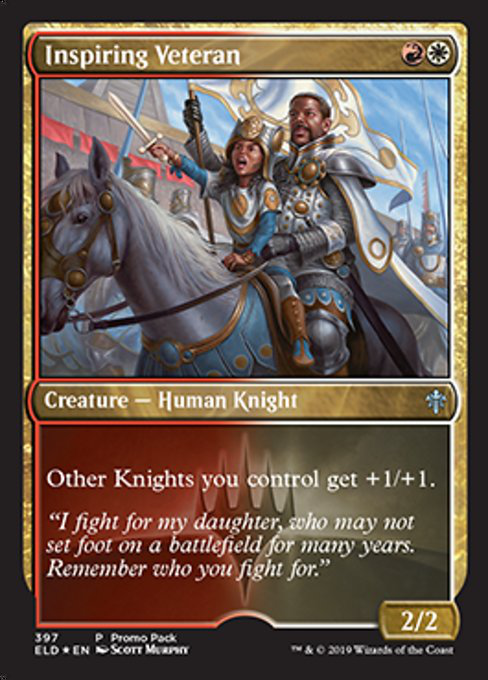

In [7]:
response = requests.get(images[0]['normal'])
img = Image.open(BytesIO(response.content))
img

In [28]:
scryfall.set_index('name')

all_parts  \
name                                                                                          
Inspiring Veteran                                                                       NaN   
Improbable Alliance                                                                     NaN   
Kenrith's Transformation                                                                NaN   
Slaying Fire                                                                            NaN   
Glass Casket                                                                            NaN   
Piper of the Swarm                                                                      NaN   
Fabled Passage                                                                          NaN   
Castle Vantress                                                                         NaN   
Castle Locthwain                                                                        NaN   
Castle Garenbrig                                                                        NaN   
Castle Embereth                                                                         NaN   
Castle Ardenvale                                                                        NaN   
Stonecoil Serpent                                                                       NaN   
Sorcerous Spyglass                                                                      NaN   
Stormfist Crusader                                                                      NaN   
Outlaws' Merriment                                                                      NaN   
Lochmere Serpent                                                                        NaN   
Faeburrow Elder                                                                         NaN   
Escape to the Wilds                                                                     NaN   
Doom Foretold                                                                           NaN   
Dance of the Manse                                                                      NaN   
Yorvo, Lord of Garenbrig                                                                NaN   
Wildborn Preserver                                                                      NaN   
Wicked Wolf                                                                             NaN   
Return of the Wildspeaker                                                               NaN   
Questing Beast                                                                          NaN   
Once Upon a Time                                                                        NaN   
The Great Henge                                                                         NaN   
Gilded Goose                                                                            NaN   
Feasting Troll King                                                                     NaN   
Torbran, Thane of Red Fell                                                              NaN   
Sundering Stroke                                                                        NaN   
Robber of the Rich                                                                      NaN   
Opportunistic Dragon                                                                    NaN   
Irencrag Pyromancer                                                                     NaN   
Irencrag Feat                                                                           NaN   
Fires of Invention                                                                      NaN   
Fervent Champion                                                                        NaN   
Embercleave                                                                             NaN   
Witch's Vengeance                                                                       NaN   
Wishclaw Talisman                                                                       NaN 